In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Pathlib bruges til at opsætte sti til fil
from pathlib import Path

### Path til filsti opsættes ###

In [2]:
# Path til filsti opsættes
cwd = Path.cwd()
data_file = Path(r'C:\Users\mpede\source\repos\mpeder75\The Ai engineer course\utils\news_articles.csv')

### Load data ###

In [3]:
# Data indklæses i variabel bbc_data
data = pd.read_csv(data_file)

### Clean Data ###


In [4]:
# take just the content of the article, lowercase and remove punctuation
articles = data['content'].str.lower().apply(lambda x: re.sub(r"([^\w\s])", "", x))

In [5]:
# stop word removal
en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

In [6]:
# tokenize
articles = articles.apply(lambda x: word_tokenize(x))

In [7]:
# stemming (done for speed as we have a lot of text)
ps = PorterStemmer()
articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])

### Vectorization ###

In [8]:
# create dictionary of all words
dictionary = corpora.Dictionary(articles)
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [9]:
# vecotize using bag of words into a document term matrix
doc_term = [dictionary.doc2bow(text) for text in articles]

### LSA Model ###

In [10]:
# specify number of topics
num_topics = 2

In [11]:
# create LSA model
lsamodel = LsiModel(doc_term, num_topics=num_topics, id2word = dictionary)
print(lsamodel.print_topics(num_topics=num_topics, num_words=5))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"')]


### Determin optimal number of topics ###

In [15]:
# generate coherence scores to determine an optimum number of topics
# tager 2 min at beregne !!!
coherence_values = []
model_list = []

min_topics = 2
max_topics = 11

for num_topics_i in range(min_topics, max_topics+1):
    model = LsiModel(doc_term, num_topics=num_topics_i, id2word = dictionary, random_seed=0)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

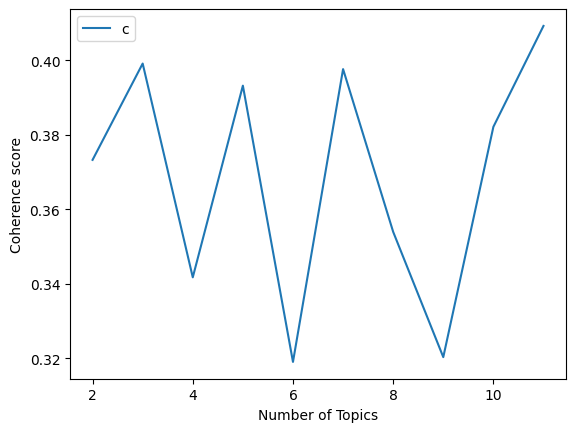

In [13]:
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
final_n_topics = 3
lsamodel_f = LsiModel(doc_term, num_topics=final_n_topics, id2word = dictionary)
print(lsamodel_f.print_topics(num_topics=final_n_topics, num_words=5))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"'), (2, '0.460*"saudi" + 0.264*"taliban" + -0.249*"weight" + 0.194*"afghanistan" + -0.191*"dr"')]
